In [1]:
pip install opencv-python

# Importing libraries

In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Preprocessing: Detecting face and eyes

In [3]:
my_img = cv2.imread(r'E:\ML\Projects\Spiderman Image Classification\dataset\andrew_garfield\Andrew Garfield Archives - Your Source.jpg')
my_img.shape

(1452, 2048, 3)

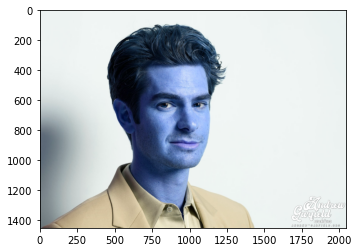

In [4]:
plt.imshow(my_img)

In [5]:
my_gray_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
my_gray_img.shape

(1452, 2048)

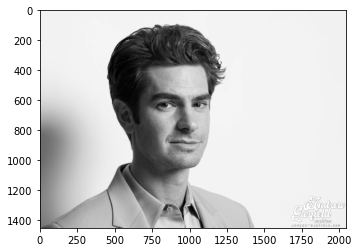

In [6]:
#now that we want a gray scale image

plt.imshow(my_gray_img, cmap = 'gray') 

In [7]:
#implementing haar cascade to identify face and eyes

face_cascade = cv2.CascadeClassifier('E:\ML\Projects\Spiderman Image Classification\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('E:\ML\Projects\Spiderman Image Classification\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(my_gray_img, 1.3, 5)
faces

array([[694, 399, 555, 555]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(694, 399, 555, 555)

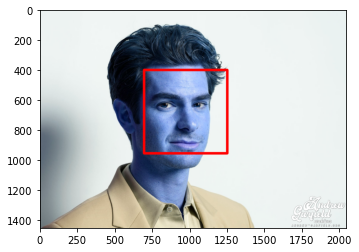

In [9]:
img = cv2.rectangle(my_img,(x,y),(x+w,y+h),(255,0,0),15)
plt.imshow(img)

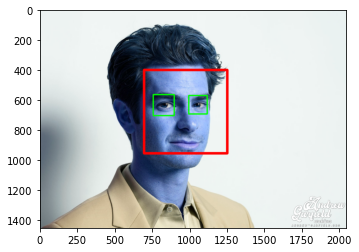

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = my_gray_img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),8)
        

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

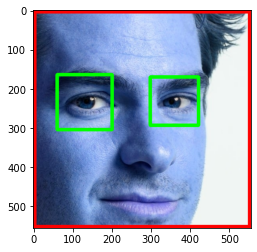

In [11]:
plt.imshow(roi_color, cmap = 'gray')

In [12]:
# so putting everything alltogather in a function

def function_returning_cropped_face(image_path):
    try :
        my_img = cv2.imread(image_path)
        my_gray_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
        plt.imshow(my_gray_img, cmap = 'gray') #as we want a gray scale image
        faces = face_cascade.detectMultiScale(my_gray_img, 1.3, 5)
        (x,y,w,h) = faces[0]
        img = cv2.rectangle(my_img,(x,y),(x+w,y+h),(255,0,0),1)
        cv2.destroyAllWindows()
        for (x,y,w,h) in faces:
            img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = my_gray_img[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
        return roi_color
    except :
        print("tuple index out of range")
    
    

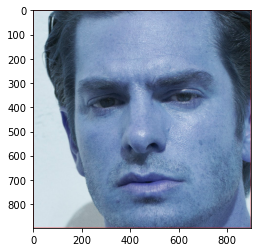

In [13]:
cropped_image = function_returning_cropped_face(r'E:\ML\Projects\Spiderman Image Classification\dataset\andrew_garfield\Playing Jonathan Larson Married Andrew.jpg')
plt.imshow(cropped_image)

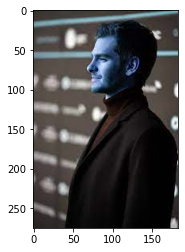

In [14]:
#testing clogged image

clogged_image = cv2.imread(r'E:\ML\Projects\Spiderman Image Classification\dataset\andrew_garfield\side profile.jpg')
plt.imshow(clogged_image)

tuple index out of range


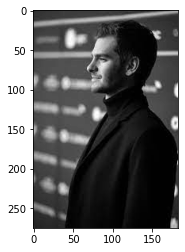

In [15]:
cropped_clogged = function_returning_cropped_face(r'E:\ML\Projects\Spiderman Image Classification\dataset\andrew_garfield\side profile.jpg')
cropped_clogged #this image doesn't have 2 eyes

# Creating directories with cropped faces

In [16]:
path_to_dataset = r"E:\ML\Projects\Spiderman Image Classification\dataset/"

path_to_cropped_dataset = r"E:\ML\Projects\Spiderman Image Classification\dataset\cropped_folder/"

In [17]:
import os

# creating array of paths of dataset

img_dirs = []
for entry in os.scandir(path_to_dataset):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs

['E:\\ML\\Projects\\Spiderman Image Classification\\dataset/andrew_garfield',
 'E:\\ML\\Projects\\Spiderman Image Classification\\dataset/cropped_folder',
 'E:\\ML\\Projects\\Spiderman Image Classification\\dataset/tobey_maguire',
 'E:\\ML\\Projects\\Spiderman Image Classification\\dataset/tom_holland']

In [18]:
import shutil
if os.path.exists(path_to_cropped_dataset):
     shutil.rmtree(path_to_cropped_dataset)
os.mkdir(path_to_cropped_dataset)

andrew_garfield
Generating cropped images in folder:  E:\ML\Projects\Spiderman Image Classification\dataset\cropped_folder/andrew_garfield
E:\ML\Projects\Spiderman Image Classification\dataset\cropped_folder/andrew_garfield/andrew_garfield1.jpg
E:\ML\Projects\Spiderman Image Classification\dataset\cropped_folder/andrew_garfield/andrew_garfield2.jpg
E:\ML\Projects\Spiderman Image Classification\dataset\cropped_folder/andrew_garfield/andrew_garfield3.jpg
tuple index out of range
E:\ML\Projects\Spiderman Image Classification\dataset\cropped_folder/andrew_garfield/andrew_garfield4.jpg
E:\ML\Projects\Spiderman Image Classification\dataset\cropped_folder/andrew_garfield/andrew_garfield5.jpg
E:\ML\Projects\Spiderman Image Classification\dataset\cropped_folder/andrew_garfield/andrew_garfield6.jpg
E:\ML\Projects\Spiderman Image Classification\dataset\cropped_folder/andrew_garfield/andrew_garfield7.jpg
E:\ML\Projects\Spiderman Image Classification\dataset\cropped_folder/andrew_garfield/andrew_ga

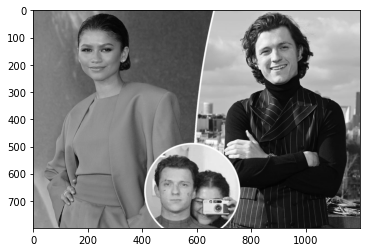

In [19]:
cropped_image_directory = []
spidy_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    head_tail = os.path.split(img_dir)
    spidy_name = head_tail[1]
    print(spidy_name)
    
    spidy_file_names_dict[spidy_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = function_returning_cropped_face(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_dataset + spidy_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_directory.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = spidy_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            try :
                cv2.imwrite(cropped_file_path, roi_color)
                print(cropped_file_path)
            except :
                print(cropped_file_path + " cancled")
            
            spidy_file_names_dict[spidy_name].append(cropped_file_path)
            count += 1 

I have cleaned the further data manually here by deleting the redundent and clogged images images

In [20]:
# wavelet transformation from stackoverflow

import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


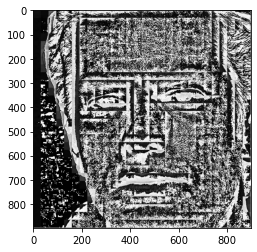

In [21]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [22]:
class_dict = {}
count = 0
for spidy_name in spidy_file_names_dict.keys():
    class_dict[spidy_name] = count
    count = count + 1
class_dict

{'andrew_garfield': 0,
 'cropped_folder': 1,
 'tobey_maguire': 2,
 'tom_holland': 3}

In [25]:
x, y = [], []
for spidy_name, training_files in spidy_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[spidy_name])    

In [24]:
print("length of training set is " + str(len(x)))

length of training set is 397


# Model Training

In [65]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])

x_train_data = np.array(X_train)
x_test_data = np.array(X_test)

xsamples, xx, xy = x_train_data.shape
x_train_reshape = x_train_data.reshape((xsamples,xx*xy))

xxsamples, xxx, xxy = x_test_data.shape
x_test_reshape = x_test_data.reshape((xxsamples,xxx*xxy))

# ysamples, yx, yy = y_train_data.shape
# y_train_reshape = y_train_data.reshape((ysamples,yx*yy))

pipe.fit(x_train_reshape, y_train_data)
pipe.score(x_test_reshape, y_test)

0.3625

In [73]:
model_parameters = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [75]:
scores = []
best_estimators = {}

for algo, mp in model_parameters.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train_reshape, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.674901,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.558482,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.646627,{'logisticregression__C': 5}


In [79]:
svm_model = LogisticRegression().fit(x_train_reshape, y_train)
svm_model.score(x_test_reshape, y_test)

C:\Users\Soman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7

In [85]:
best_estimators['svm'].score(x_test_reshape, y_test)

0.7

In [83]:
best_estimators['random_forest'].score(x_test_reshape, y_test)

0.5625

In [86]:
best_estimators['logistic_regression'].score(x_test_reshape, y_test)

0.7125

# Visualization with confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [92]:
cm = confusion_matrix(y_test, best_estimators['logistic_regression'].predict(x_test_reshape))
cm

array([[ 9,  2,  6],
       [ 3, 29,  2],
       [ 4,  6, 19]], dtype=int64)

Text(69.0, 0.5, 'Truth')

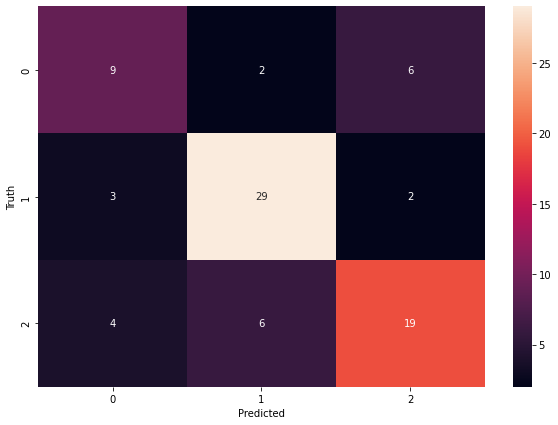

In [93]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')